In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# Cargamos y modificamos
df = pd.read_csv("Chihuahua_clima.csv", index_col=0)
df = df.rename(columns={"Rs (W/m²)": "Rs(w/m)"})

df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")
df

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,22,4.0,15.8,-5.337960,89.396630
1,2020-04-01 13:10:00,2020,4,1,23,17.0,15.8,-4.812238,87.208510
2,2020-04-01 13:20:00,2020,4,1,23,34.0,16.6,-4.187424,85.017212
3,2020-04-01 13:30:00,2020,4,1,26,47.0,17.0,-2.415345,82.823682
4,2020-04-01 13:40:00,2020,4,1,27,49.0,17.1,-1.884415,80.628862
...,...,...,...,...,...,...,...,...,...
22571,2021-04-01 00:20:00,2021,4,1,10,202.0,25.2,-7.380279,77.286479
22572,2021-04-01 00:30:00,2021,4,1,11,165.0,24.6,-6.747384,79.478675
22573,2021-04-01 00:40:00,2021,4,1,11,128.0,24.1,-7.096539,81.671314
22574,2021-04-01 01:00:00,2021,4,1,13,41.0,22.7,-6.226008,86.054061


In [5]:
# Normalizamos
# Creamos una copia del dataframe
norm_df = df.copy()

# Normalización Min Max sobre columnas con distribución no normal
norm_cols = ["Rs(w/m)"]
scalerNorm = MinMaxScaler()
norm_df[norm_cols] = scalerNorm.fit_transform(norm_df[norm_cols])

# Estandarizar aquellas con distribución normal.
std_cols = ['HR (%)', 'Td form', 'Theta']
scalerStd = StandardScaler()
norm_df[std_cols] = scalerStd.fit_transform(norm_df[std_cols])


temp_std = StandardScaler()
norm_df[['T Aire (C)']] = temp_std.fit_transform(norm_df[["T Aire (C)"]])
norm_df.head()

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,-0.125609,0.002196,-1.167043,-0.805672,1.679868
1,2020-04-01 13:10:00,2020,4,1,-0.062355,0.011713,-1.167043,-0.731814,1.577984
2,2020-04-01 13:20:00,2020,4,1,-0.062355,0.024158,-1.069714,-0.644035,1.475952
3,2020-04-01 13:30:00,2020,4,1,0.127408,0.033675,-1.021050,-0.395078,1.373816
4,2020-04-01 13:40:00,2020,4,1,0.190662,0.035139,-1.008884,-0.320489,1.271620


In [6]:
# Normalizamos
# Creamos una copia del dataframe
norm_df = df.copy()

# Normalización Min Max sobre columnas con distribución no normal
norm_cols = ["Rs(w/m)"]
scalerNorm = MinMaxScaler()
norm_df[norm_cols] = scalerNorm.fit_transform(norm_df[norm_cols])

# Estandarizar aquellas con distribución normal.
std_cols = ['HR (%)', 'Td form', 'Theta']
scalerStd = StandardScaler()
norm_df[std_cols] = scalerStd.fit_transform(norm_df[std_cols])


temp_std = StandardScaler()
norm_df[['T Aire (C)']] = temp_std.fit_transform(norm_df[["T Aire (C)"]])
norm_df.head()

,Timestamp,Year,Mes,Dia,HR (%),Rs(w/m),T Aire (C),Td form,Theta
0,2020-04-01 13:00:00,2020,4,1,-0.125609,0.002196,-1.167043,-0.805672,1.679868
1,2020-04-01 13:10:00,2020,4,1,-0.062355,0.011713,-1.167043,-0.731814,1.577984
2,2020-04-01 13:20:00,2020,4,1,-0.062355,0.024158,-1.069714,-0.644035,1.475952
3,2020-04-01 13:30:00,2020,4,1,0.127408,0.033675,-1.021050,-0.395078,1.373816
4,2020-04-01 13:40:00,2020,4,1,0.190662,0.035139,-1.008884,-0.320489,1.271620


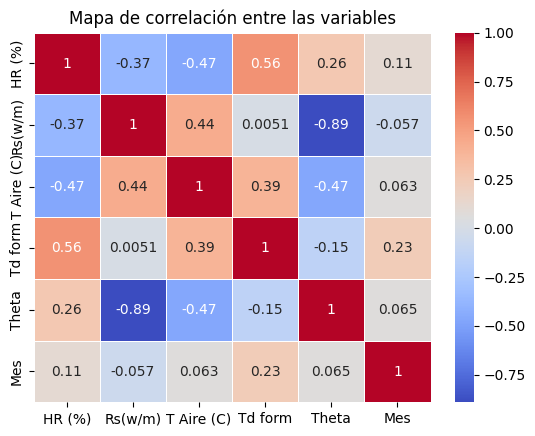

In [8]:
# obtenemos las columnas númericas y el Mes
cols = list(norm_df.loc[:, "HR (%)":].columns)
cols = cols + ["Mes"]

corr_mat = norm_df.loc[:, cols].corr()

sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Mapa de correlación entre las variables")
plt.show()

In [9]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR


modelos_lin = {
    "Regresion Lineal": LinearRegression(),
    "Regresion Polinomica": make_pipeline(PolynomialFeatures(degree=5), LinearRegression()),
    "SVR": SVR()
}

# Configurar k-fold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=614)

X = norm_df[["HR (%)"]]
y = norm_df[["T Aire (C)"]]

# Evaluar
kfold_results = {}
for nombre, modelo in modelos_lin.items():
    scores = cross_val_score(modelo, X, y, cv=kf, scoring="r2")
    
    kfold_results[nombre] = {
        "Mean r2": np.mean(scores),
        "Todo": scores
    }
    
pd.DataFrame(kfold_results).T

c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please chan

,Mean r2,Todo
Regresion Lineal,0.218341,"[0.19365963339336834, 0.21221945047605906, 0.2..."
Regresion Polinomica,0.226207,"[0.1987301623832889, 0.22227469645229758, 0.23..."
SVR,0.187321,"[0.16403756256482993, 0.19089399862384815, 0.1..."


In [10]:
# Defining regression models
modelos_regresion = {
    "Regresión Lineal": LinearRegression(),
    "Regresión Polinomica": make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
}


# Definimos características y objetivo
X = norm_df[["HR (%)", "Td form", "Rs(w/m)"]]
y = norm_df["T Aire (C)"]

# Con K-Fold, evaluaremos cada modelo.
kfold_results = {}
for nombre, modelo in modelos_regresion.items():
    scores = cross_val_score(modelo, X, y, cv=kf, scoring='r2')
    
    kfold_results[nombre] = {
        "Promedio R2": np.mean(scores),
        "Std R2": np.std(scores),
        "All R2": scores
    }

# Creamos un dataframe con los resultados de cada modelo para observar su calidad.
pd.DataFrame(kfold_results).T.head()

,Promedio R2,Std R2,All R2
Regresión Lineal,0.836357,0.00397,"[0.8381154527704355, 0.8295114431417798, 0.841..."
Regresión Polinomica,0.999034,0.00004,"[0.9989723967434089, 0.9990110608657279, 0.999..."


In [12]:
# Instanciamos el modelo
from sklearn.model_selection import train_test_split

reg = SVR()

# Dividimos los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=614)

# Entrenamos SVR
reg.fit(X_train, y_train)

# Obtenemos métricas
y_pred = reg.predict(X_test)

print(f"rMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R^2 score: {r2_score(y_test, y_pred)}")

rMSE: 0.06146708832252158
R^2 score: 0.9961988858089996


In [15]:
df = pd.read_csv("./Student_performance.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [16]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [17]:
# Categorizamos la columna "Extracurricular" poniendo 0 y 1s
df['Extracurricular Activities'] = df['Extracurricular Activities'].apply(lambda x: 1 if x == 'Yes' else 0)

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


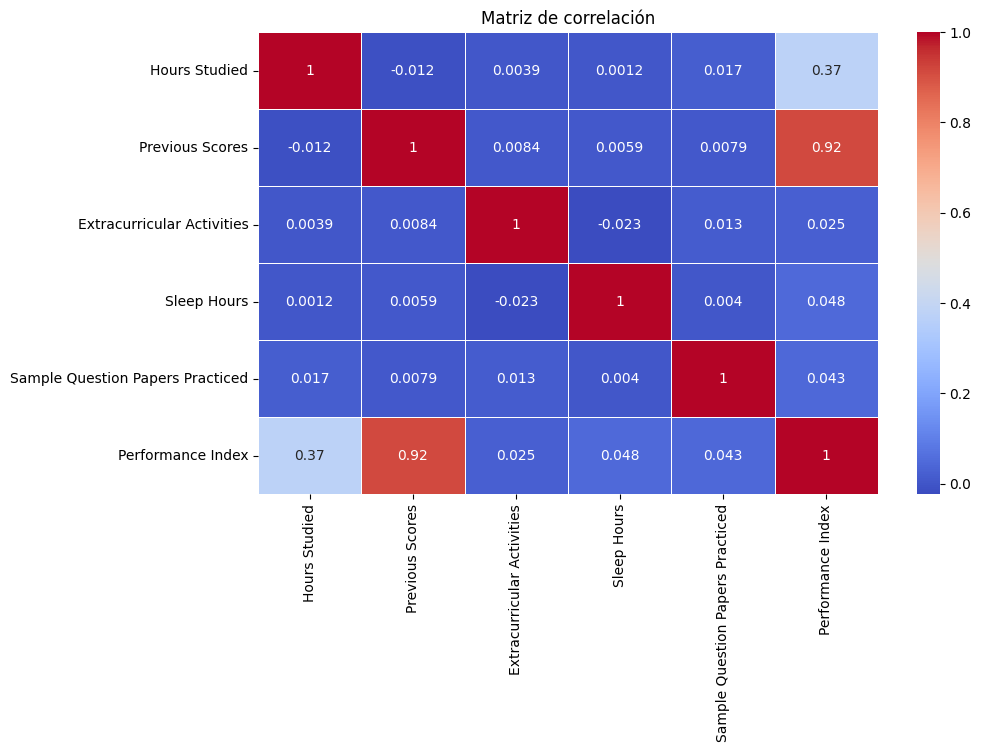

In [18]:
# Observamos la matríz de correlacion
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de correlación')
plt.show()

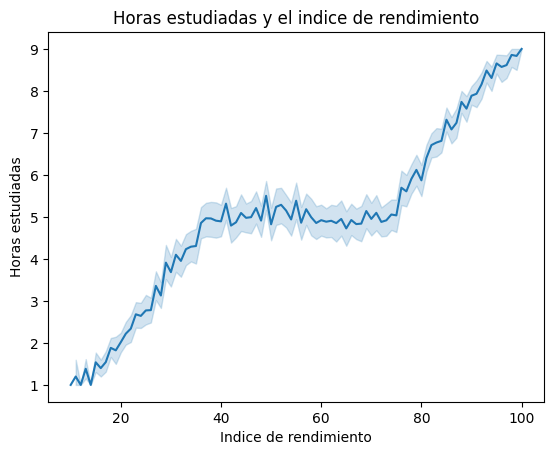

In [19]:
sns.lineplot(data=df, y='Hours Studied', x='Performance Index')

plt.title('Horas estudiadas y el indice de rendimiento')
plt.ylabel('Horas estudiadas')
plt.xlabel('Indice de rendimiento')
plt.show()

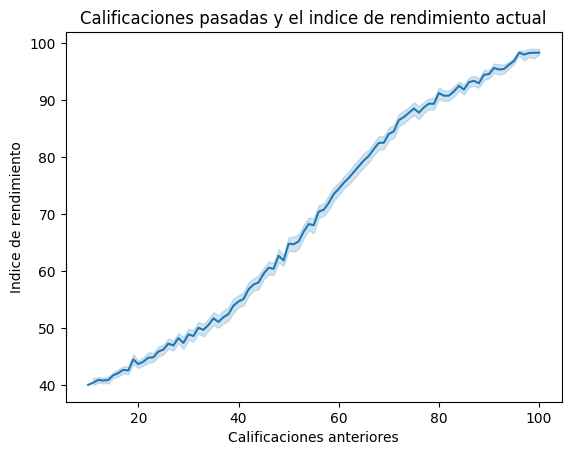

In [20]:
# Veamos la misma grafica comparando ahora las horas estudiadas y la calificacion anterior
sns.lineplot(y=df['Previous Scores'], x=df['Performance Index'])
plt.xlabel('Calificaciones anteriores')
plt.ylabel('Indice de rendimiento')
plt.title('Calificaciones pasadas y el indice de rendimiento actual')
plt.show()

In [21]:
# Metodo para seleccionar caracteristicas
from sklearn.feature_selection import SequentialFeatureSelector


# Reg
model = LinearRegression()
sfs = SequentialFeatureSelector(model, direction="backward")


# Separar
X = df.drop(columns=["Performance Index"])
y = df[["Performance Index"]]

# Separar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=614)

sfs.fit(X_train, y_train)

SequentialFeatureSelector(direction='backward', estimator=LinearRegression())

In [23]:
sfs.get_support()

array([ True,  True, False,  True, False])

In [24]:
sfs.get_feature_names_out()

array(['Hours Studied', 'Previous Scores', 'Sleep Hours'], dtype=object)

In [25]:
# Instanciamos los modelos de nuevo
linear = LinearRegression()
poly = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
reg = SVR()

# Entrenamos
linear.fit(X_train, y_train)
poly.fit(X_train, y_train)
reg.fit(X_train, y_train)

c:\Users\07020\Dev\curso_ml\venv\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
# Creamos una función para las métricas
def metricas(modelo):
    name = modelo.__class__.__name__
    
    y_pred = modelo.predict(X_test)
    
    print(f" {name} ".center(45, "*"))
    print(f"rMSE: {root_mean_squared_error(y_test, y_pred)}")
    print(f"R^2: {r2_score(y_test, y_pred)}")
    

metricas(linear)
metricas(poly)
metricas(reg)

************** LinearRegression *************
rMSE: 2.0226569107371835
R^2: 0.9885987126274841
****************** Pipeline *****************
rMSE: 2.0375236256305955
R^2: 0.9884304956579557
******************** SVR ********************
rMSE: 2.300177304587847
R^2: 0.9852554312408621
